In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess
import glob
import os

# POLOCM2 BASELINE acceptance rate

In [2]:


# Read and clean
p2_folder_path = "../../output/p2/"
csv_files = glob.glob(os.path.join(p2_folder_path, "*.csv"))
p2_df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)
p2_df = p2_df[p2_df['remark'] != 'Timeout']
p2_df.columns = p2_df.columns.str.strip()
p2_df['len%'] = p2_df['len%'].astype(float) * 100.0

p2b_folder_path = "../../output/p2b/"
csv_files = glob.glob(os.path.join(p2b_folder_path, "*.csv"))
p2b_df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)
p2b_df = p2b_df[p2b_df['remark'] != 'Timeout']
p2b_df.columns = p2b_df.columns.str.strip()
p2b_df['len%'] = p2b_df['len%'].astype(float) * 100.0

to_folder_path = "../../output/total/"
to_df = pd.read_csv(os.path.join(to_folder_path, "acceptance_rate.csv"))
to_df.columns = to_df.columns.str.strip()
to_df['len%'] = to_df['len%'].astype(float) * 100.0





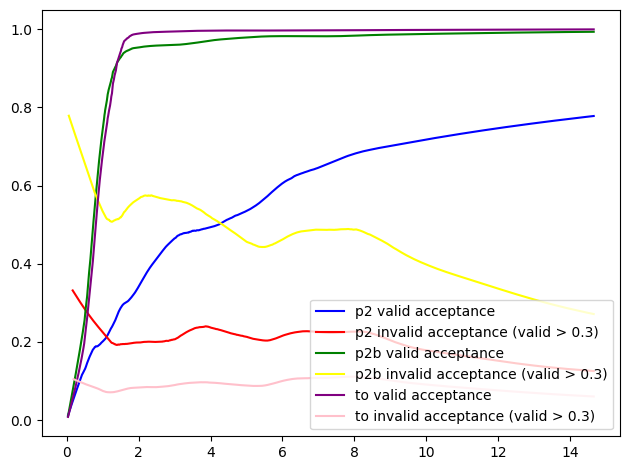

In [3]:
p2_df_len = p2_df.sort_values(by='len%')
p2b_df_len = p2b_df.sort_values(by='len%')
to_df_len = to_df.sort_values(by='len%')

# Apply LOWESS to full valid_exe
valid_smoothed_p2 = lowess(p2_df_len['acceptance_rate'], p2_df_len['len%'], frac=0.3)
filtered_df_p2 = p2_df_len[p2_df_len['acceptance_rate'] > 0.3]
invalid_smoothed_p2 = lowess(filtered_df_p2['invalid_acceptance_rate'], filtered_df_p2['len%'], frac=0.3)


valid_smoothed_p2b = lowess(p2b_df_len['acceptance_rate'], p2b_df_len['len%'], frac=0.3)
filtered_df_p2b = p2b_df_len[p2b_df_len['acceptance_rate'] > 0.3]
invalid_smoothed_p2b = lowess(filtered_df_p2b['invalid_acceptance_rate'], filtered_df_p2b['len%'], frac=0.3)

valid_smoothed_to = lowess(to_df_len['acceptance_rate'], to_df_len['len%'], frac=0.3)
filtered_df_to = to_df_len[to_df_len['acceptance_rate'] > 0.3]
invalid_smoothed_to = lowess(filtered_df_to['invalid_acceptance_rate'], filtered_df_to['len%'], frac=0.3)



plt.plot(valid_smoothed_p2[:, 0], valid_smoothed_p2[:, 1], label='p2 valid acceptance', color='blue')
plt.plot(invalid_smoothed_p2[:, 0], invalid_smoothed_p2[:, 1], label='p2 invalid acceptance (valid > 0.3)', color='red')

plt.plot(valid_smoothed_p2b[:, 0], valid_smoothed_p2b[:, 1], label='p2b valid acceptance', color='green')
plt.plot(invalid_smoothed_p2b[:, 0], invalid_smoothed_p2b[:, 1], label='p2b invalid acceptance (valid > 0.3)', color='yellow')

plt.plot(valid_smoothed_to[:, 0], valid_smoothed_to[:, 1], label='to valid acceptance', color='purple')
plt.plot(invalid_smoothed_to[:, 0], invalid_smoothed_to[:, 1], label='to invalid acceptance (valid > 0.3)', color='pink')


plt.legend()
plt.tight_layout()
plt.show()

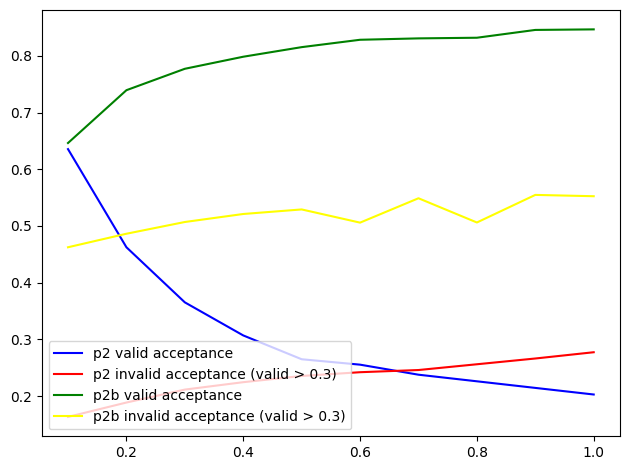

In [4]:
p2_df_flex = p2_df.sort_values(by='dod')
p2b_df_flex = p2b_df.sort_values(by='dod')


# Apply LOWESS to full valid_exe
valid_smoothed_p2 = lowess(p2_df_flex['acceptance_rate'], p2_df_flex['dod'], frac=0.3)
filtered_df_p2 = p2_df_flex[p2_df_flex['acceptance_rate'] > 0.3]
invalid_smoothed_p2 = lowess(filtered_df_p2['invalid_acceptance_rate'], filtered_df_p2['dod'], frac=0.3)


valid_smoothed_p2b = lowess(p2b_df_flex['acceptance_rate'], p2b_df_flex['dod'], frac=0.3)
filtered_df_p2b = p2b_df_flex[p2b_df_flex['acceptance_rate'] > 0.3]
invalid_smoothed_p2b = lowess(filtered_df_p2b['invalid_acceptance_rate'], filtered_df_p2b['dod'], frac=0.3)




plt.plot(valid_smoothed_p2[:, 0], valid_smoothed_p2[:, 1], label='p2 valid acceptance', color='blue')
plt.plot(invalid_smoothed_p2[:, 0], invalid_smoothed_p2[:, 1], label='p2 invalid acceptance (valid > 0.3)', color='red')

plt.plot(valid_smoothed_p2b[:, 0], valid_smoothed_p2b[:, 1], label='p2b valid acceptance', color='green')
plt.plot(invalid_smoothed_p2b[:, 0], invalid_smoothed_p2b[:, 1], label='p2b invalid acceptance (valid > 0.3)', color='yellow')




plt.legend()
plt.tight_layout()
plt.show()

# Accuracy and Error rate

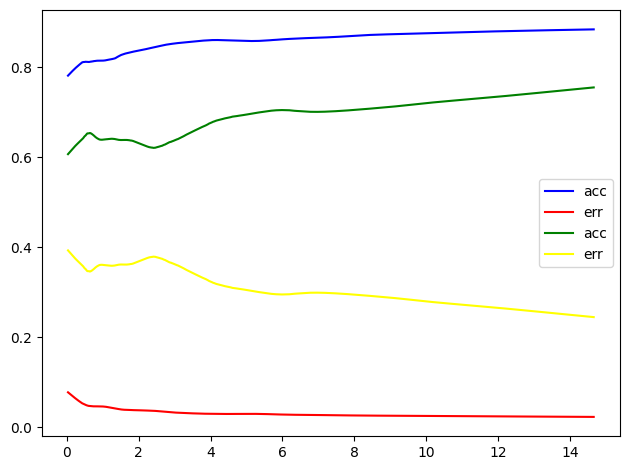

In [5]:

acc_p2 = lowess(p2_df_len['accuracy'], p2_df_len['len%'], frac=0.3)
err_p2 = lowess(p2_df_len['error_rate'], p2_df_len['len%'], frac=0.3)

acc_p2b = lowess(p2b_df_len['accuracy'], p2b_df_len['len%'], frac=0.3)
err_p2b = lowess(p2b_df_len['error_rate'], p2b_df_len['len%'], frac=0.3)

# Combine into dataframe for seaborn



plt.plot(acc_p2[:, 0], acc_p2[:, 1], label='acc', color='blue')
plt.plot(err_p2[:, 0], err_p2[:, 1], label='err', color='red')

plt.plot(acc_p2b[:, 0], acc_p2b[:, 1], label='acc', color='green')
plt.plot(err_p2b[:, 0], err_p2b[:, 1], label='err', color='yellow')

plt.legend()
plt.tight_layout()
plt.show()



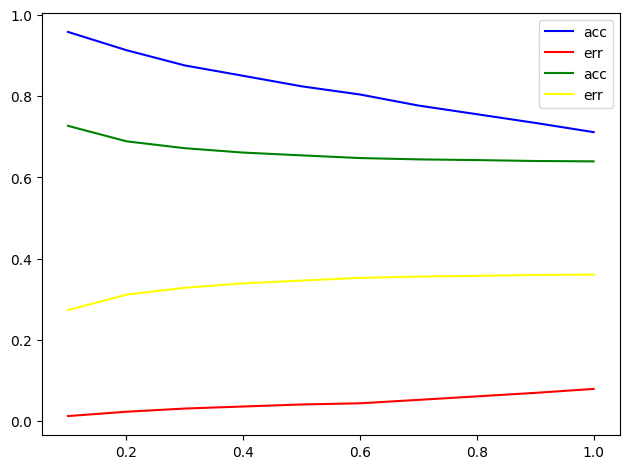

In [6]:
acc_p2 = lowess(p2_df_flex['accuracy'], p2_df_flex['dod'], frac=0.3)
err_p2 = lowess(p2_df_flex['error_rate'], p2_df_flex['dod'], frac=0.3)

acc_p2b = lowess(p2b_df_flex['accuracy'], p2b_df_flex['dod'], frac=0.3)
err_p2b = lowess(p2b_df_flex['error_rate'], p2b_df_flex['dod'], frac=0.3)

# Combine into dataframe for seaborn



plt.plot(acc_p2[:, 0], acc_p2[:, 1], label='acc', color='blue')
plt.plot(err_p2[:, 0], err_p2[:, 1], label='err', color='red')

plt.plot(acc_p2b[:, 0], acc_p2b[:, 1], label='acc', color='green')
plt.plot(err_p2b[:, 0], err_p2b[:, 1], label='err', color='yellow')

plt.legend()
plt.tight_layout()
plt.show()

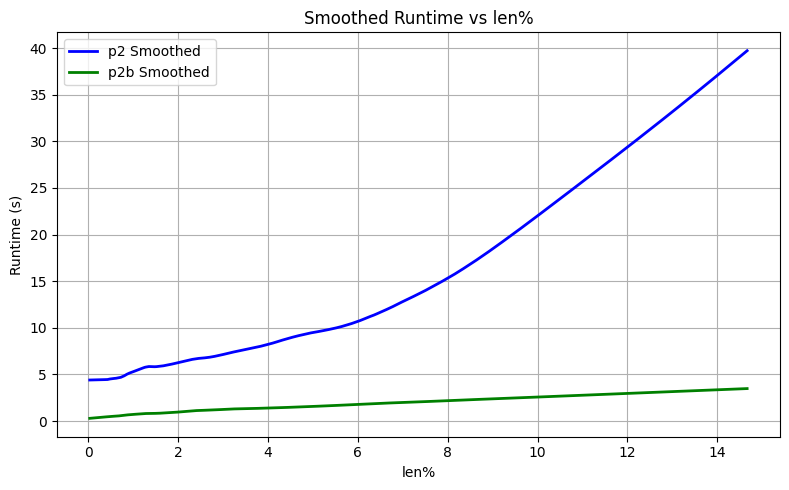

In [7]:


smoothed_p2 = lowess(p2_df_len['runtime'], p2_df_len['len%'], frac=0.3)  # Adjust frac for smoothing level
smoothed_p2b = lowess(p2b_df_len['runtime'], p2b_df_len['len%'], frac=0.3)  # Adjust frac for smoothing level

# Plot
plt.figure(figsize=(8, 5))

plt.plot(smoothed_p2[:, 0], smoothed_p2[:, 1], '-', linewidth=2, label='p2 Smoothed', color='blue')
plt.plot(smoothed_p2b[:, 0], smoothed_p2b[:, 1], '-', linewidth=2, label='p2b Smoothed', color='green')
plt.xlabel('len%')
plt.ylabel('Runtime (s)')
plt.title('Smoothed Runtime vs len%')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

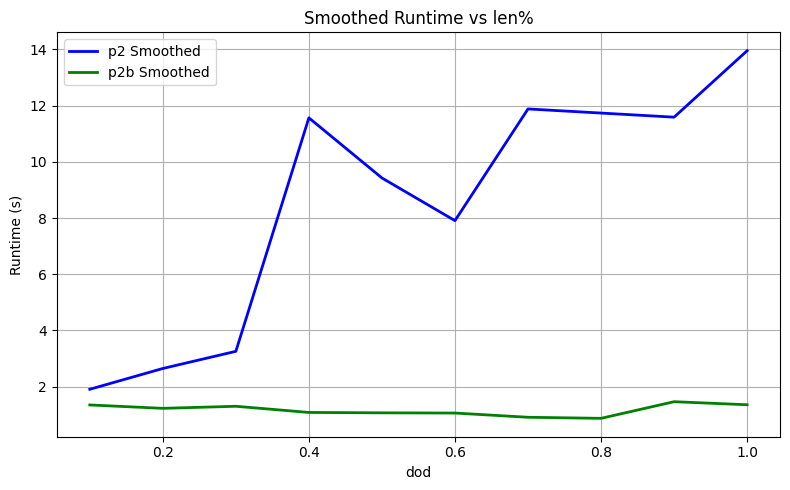

In [8]:
smoothed_p2 = lowess(p2_df_flex['runtime'], p2_df_flex['dod'], frac=0.3)  # Adjust frac for smoothing level
smoothed_p2b = lowess(p2b_df_flex['runtime'], p2b_df_flex['dod'], frac=0.3)  # Adjust frac for smoothing level

# Plot
plt.figure(figsize=(8, 5))

plt.plot(smoothed_p2[:, 0], smoothed_p2[:, 1], '-', linewidth=2, label='p2 Smoothed', color='blue')
plt.plot(smoothed_p2b[:, 0], smoothed_p2b[:, 1], '-', linewidth=2, label='p2b Smoothed', color='green')
plt.xlabel('dod')
plt.ylabel('Runtime (s)')
plt.title('Smoothed Runtime vs len%')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()